In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 30, 3
factors = [np.random.rand(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise
data[data < 0] = 0.0

In [3]:
als_results = tt.fit_ensemble(data, range(1,9), nonneg=True, replicates=10, options=dict(tol=1e-6))
als_factors = als_results[R]['factors'][0]
als_factors = tt.align_factors(als_factors, factors)[0]

Optimizing rank-1 models.
   10/10 converged, min error = 0.2921, max error = 0.2921, mean error = 0.2921, time to fit = 0.1139s
Optimizing rank-2 models.
   10/10 converged, min error = 0.2338, max error = 0.2338, mean error = 0.2338, time to fit = 0.5392s
Optimizing rank-3 models.
   10/10 converged, min error = 0.2020, max error = 0.2020, mean error = 0.2020, time to fit = 0.8740s
Optimizing rank-4 models.
   10/10 converged, min error = 0.2013, max error = 0.2014, mean error = 0.2013, time to fit = 1.1379s
Optimizing rank-5 models.
   10/10 converged, min error = 0.2006, max error = 0.2007, mean error = 0.2007, time to fit = 1.8222s
Optimizing rank-6 models.
   10/10 converged, min error = 0.2000, max error = 0.2001, mean error = 0.2001, time to fit = 2.4907s
Optimizing rank-7 models.
   10/10 converged, min error = 0.1994, max error = 0.1995, mean error = 0.1995, time to fit = 2.6559s
Optimizing rank-8 models.
   10/10 converged, min error = 0.1987, max error = 0.1990, mean error 

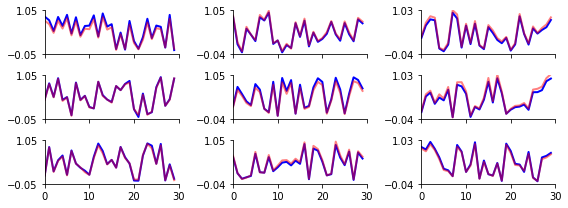

In [4]:
fig, axes, pl = tt.plot_factors(factors, line_kw=dict(color='b', lw=2))
tt.plot_factors(als_factors, line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);

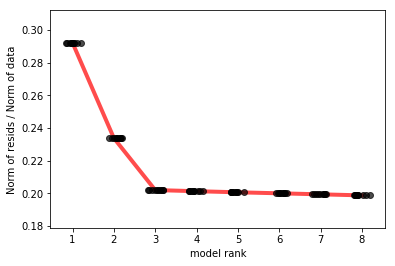

In [5]:
line_kw = {
    'color': 'r',
    'alpha': 0.7,
    'lw': 4,
    'zorder': -1
}
scatter_kw = {
    'color': 'k',
    'alpha': 0.7,
}
tt.plot_error(als_results,
              jitter=.4,
              line_kw=line_kw,
              scatter_kw=scatter_kw)